<a href="https://colab.research.google.com/github/SimeonHristov99/ML_21-22/blob/main/gan_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating "new" MNIST digits using a Generative adversarial network ([GAN](https://en.wikipedia.org/wiki/Generative_adversarial_network)).

## Imports and Constants

In [ ]:
import random
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.datasets.mnist import load_data

In [ ]:
LEAKY_RELU_ALPHA = 0.2
INPUT_NOISE_LEN = 100
FIGSIZE = (12, 10)

plt.rc('figure', figsize=FIGSIZE)
sns.set_style('whitegrid')

## Get the data

In [ ]:
(X_train, y_train), (X_test, y_test) = load_data()

## Exploratory Data Analysis

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train.dtype

dtype('uint8')

In [ ]:
for i in random.sample(range(X_train.shape[0]), k=5):
  plt.imshow(X_train[i], cmap='gray')
  plt.axis('off')
  plt.show()

## Preprocessing

In [ ]:
data = np.vstack([X_train, X_test])
data.shape

(70000, 28, 28)

In [ ]:
data.dtype

dtype('uint8')

In [ ]:
data.min(), data.max()

(0, 255)

In [ ]:
data = (data - 127.5) / 127.5

In [ ]:
data.min(), data.max()

(-1.0, 1.0)

## Model building

In [ ]:
def get_generator(n):
  inputs = tf.keras.layers.Input((n,))

  x = tf.keras.layers.Dense(256)(inputs)
  x = tf.keras.layers.LeakyReLU(LEAKY_RELU_ALPHA)(x)

  x = tf.keras.layers.Dense(512)(x)
  x = tf.keras.layers.LeakyReLU(LEAKY_RELU_ALPHA)(x)

  x = tf.keras.layers.Dense(1024)(x)
  x = tf.keras.layers.LeakyReLU(LEAKY_RELU_ALPHA)(x)

  outputs = tf.keras.layers.Dense(data.shape[1] * data.shape[2], activation='tanh')(x)
  outputs = tf.keras.layers.Reshape((data.shape[1], data.shape[2], 1))(outputs)

  model = tf.keras.Model(inputs, outputs)

  return model

In [ ]:
def get_discriminator():
  inputs = tf.keras.layers.Input((28, 28, 1))

  x = tf.keras.layers.Flatten()(inputs)
  x = tf.keras.layers.Dropout(0.4)(x)

  x = tf.keras.layers.Dense(1024)(x)
  x = tf.keras.layers.LeakyReLU(LEAKY_RELU_ALPHA)(x)
  x = tf.keras.layers.Dropout(0.4)(x)

  x = tf.keras.layers.Dense(512)(x)
  x = tf.keras.layers.LeakyReLU(LEAKY_RELU_ALPHA)(x)
  x = tf.keras.layers.Dropout(0.4)(x)

  x = tf.keras.layers.Dense(512)(x)
  x = tf.keras.layers.LeakyReLU(LEAKY_RELU_ALPHA)(x)

  outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

  model = tf.keras.Model(inputs, outputs)
  model.compile(
      optimizer=tf.keras.optimizers.Adam(lr=0.0002, beta_1=0.5),
      loss='binary_crossentropy',
  )

  return model

In [ ]:
def get_gan(gen, discr):
  discr.trainable = False

  model = tf.keras.Sequential()
  model.add(gen)
  model.add(discr)

  model.compile(
      optimizer=tf.keras.optimizers.Adam(lr=0.0002, beta_1=0.5),
      loss='binary_crossentropy',
  )

  return model

In [ ]:
g = get_generator(INPUT_NOISE_LEN)
d = get_discriminator()
gan = get_gan(g, d)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


## Train

In [ ]:
EPOCHS = 30
BATCH_SIZE = 256
HALF_BATCH = BATCH_SIZE // 2

num_batches = data.shape[0] // BATCH_SIZE
losses = []

EPOCH 0


100%|██████████| 273/273 [00:18<00:00, 15.11it/s]


Losses: 0.37457403540611267 | [2.1145923137664795, 0.0]


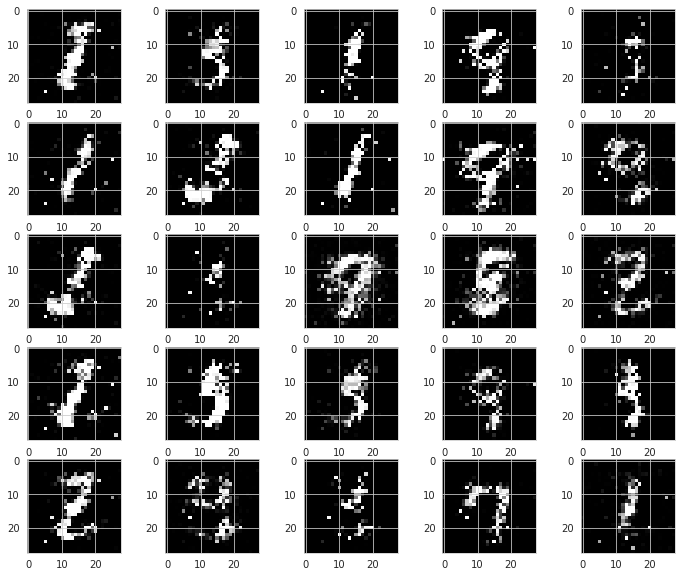

EPOCH 1


100%|██████████| 273/273 [00:17<00:00, 15.28it/s]


Losses: 0.35102003812789917 | [2.062791347503662, 0.0]


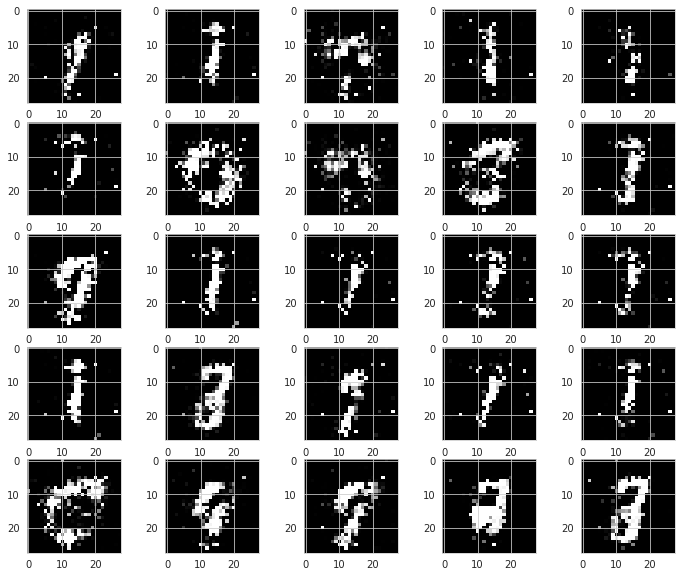

EPOCH 2


100%|██████████| 273/273 [00:18<00:00, 15.03it/s]


Losses: 0.34228241443634033 | [1.770127296447754, 0.0]


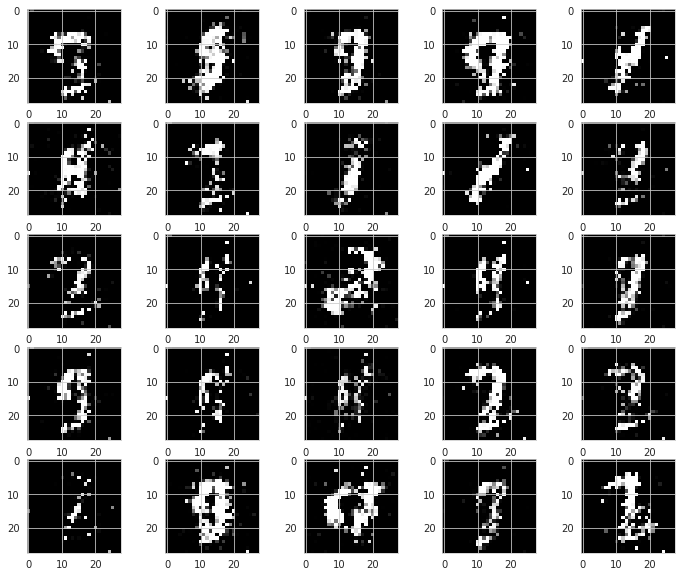

EPOCH 3


100%|██████████| 273/273 [00:18<00:00, 14.66it/s]


Losses: 0.4104069173336029 | [1.4115431308746338, 0.0]


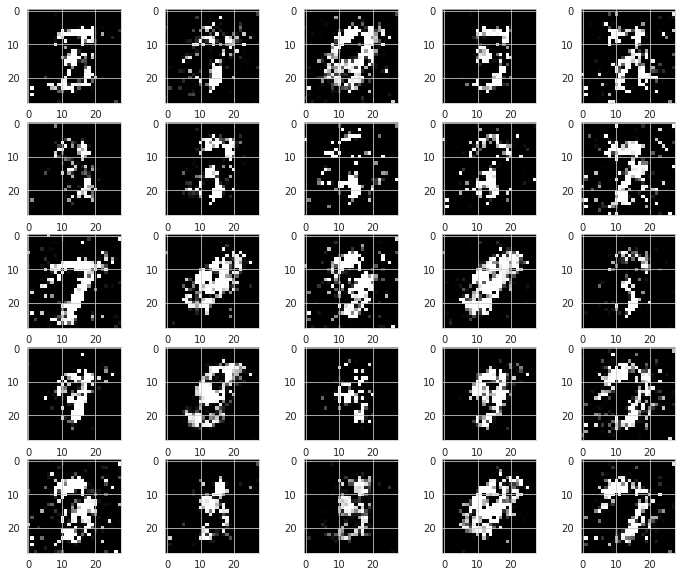

EPOCH 4


100%|██████████| 273/273 [00:18<00:00, 15.04it/s]


Losses: 0.49821737408638 | [1.4156166315078735, 0.0]


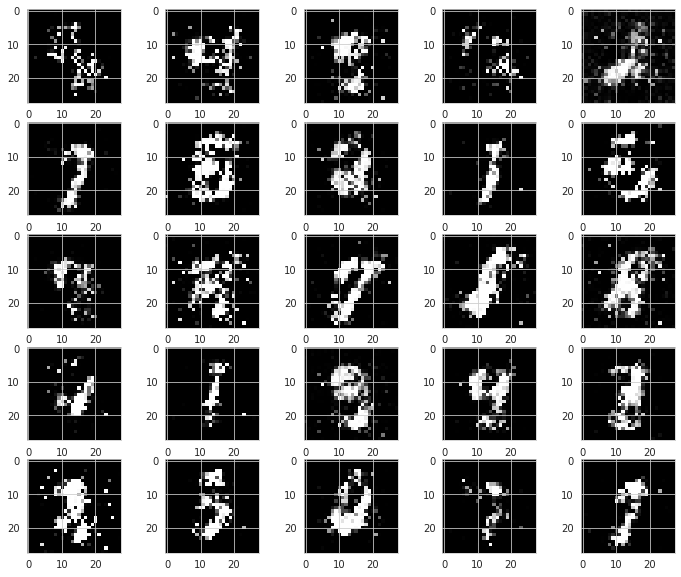

EPOCH 5


100%|██████████| 273/273 [00:18<00:00, 15.00it/s]


Losses: 0.5519065856933594 | [1.3732668161392212, 0.0]


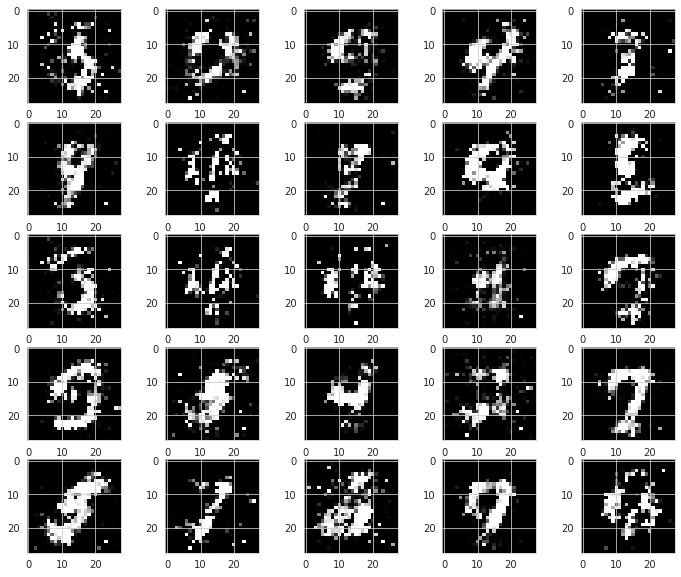

EPOCH 6


100%|██████████| 273/273 [00:18<00:00, 14.62it/s]


Losses: 0.5983973741531372 | [1.3319640159606934, 0.0]


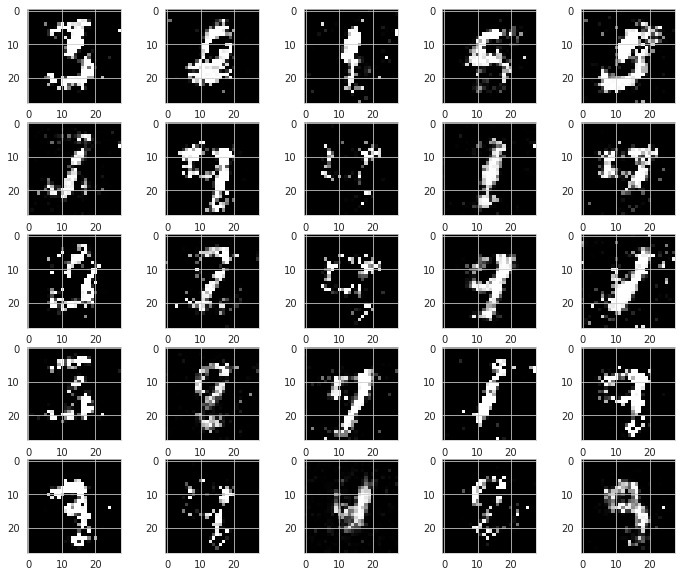

EPOCH 7


100%|██████████| 273/273 [00:18<00:00, 14.45it/s]


Losses: 0.5635531544685364 | [1.1362751722335815, 0.0]


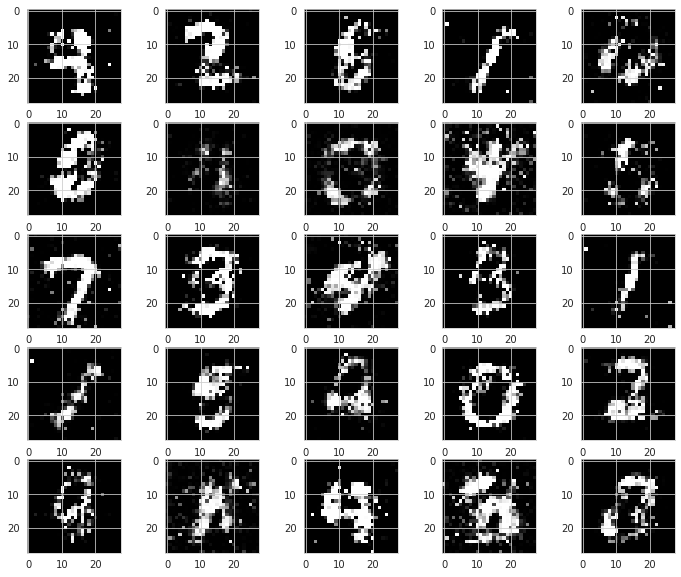

EPOCH 8


100%|██████████| 273/273 [00:18<00:00, 14.97it/s]


Losses: 0.5611703991889954 | [1.0928047895431519, 0.0]


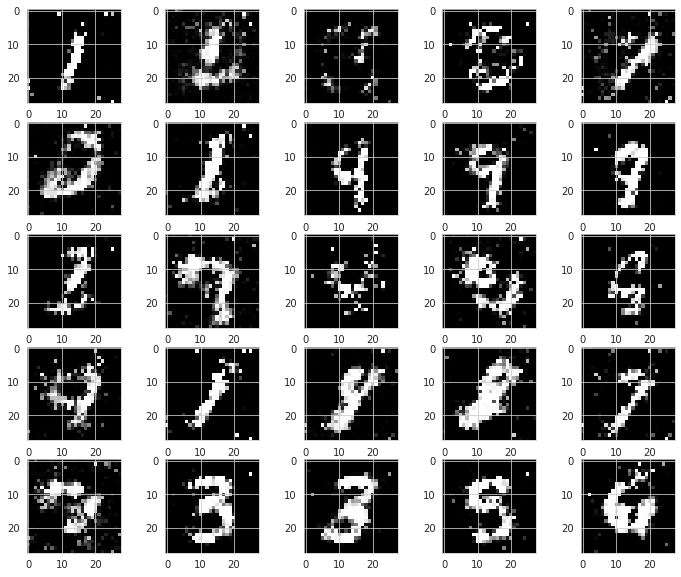

EPOCH 9


100%|██████████| 273/273 [00:18<00:00, 14.87it/s]


Losses: 0.5571105480194092 | [1.0098721981048584, 0.0]


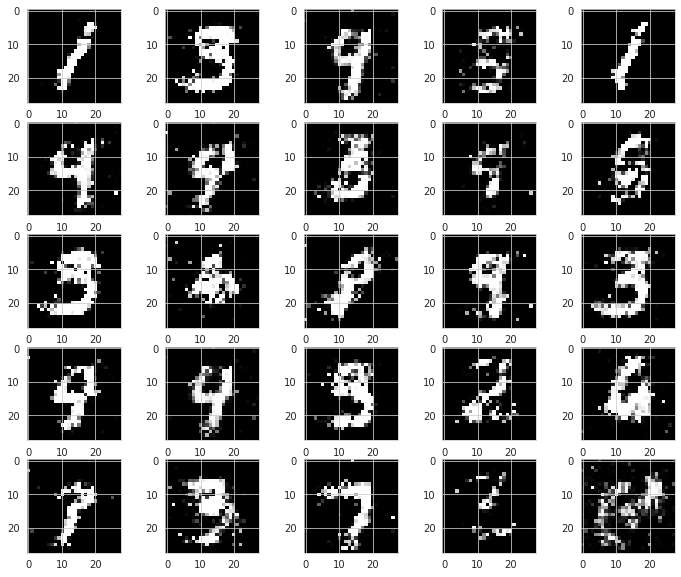

EPOCH 10


100%|██████████| 273/273 [00:18<00:00, 14.42it/s]


Losses: 0.6763893365859985 | [0.9306280016899109, 0.0]


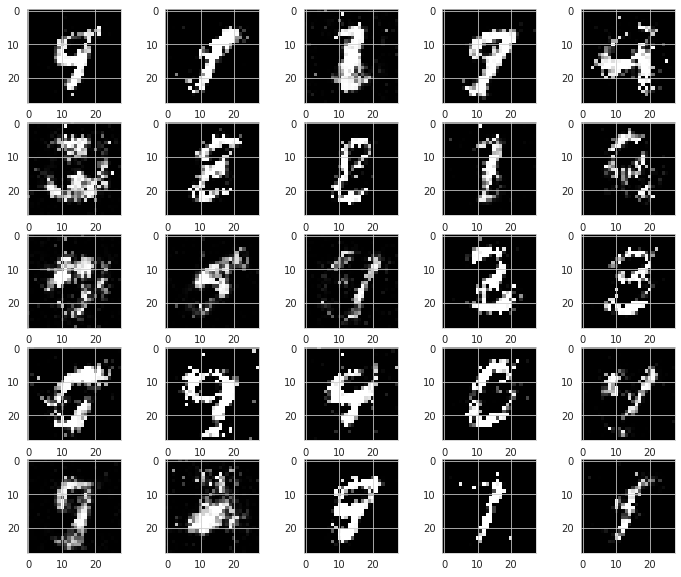

EPOCH 11


100%|██████████| 273/273 [00:18<00:00, 14.66it/s]


Losses: 0.6143153309822083 | [0.9733610153198242, 0.0]


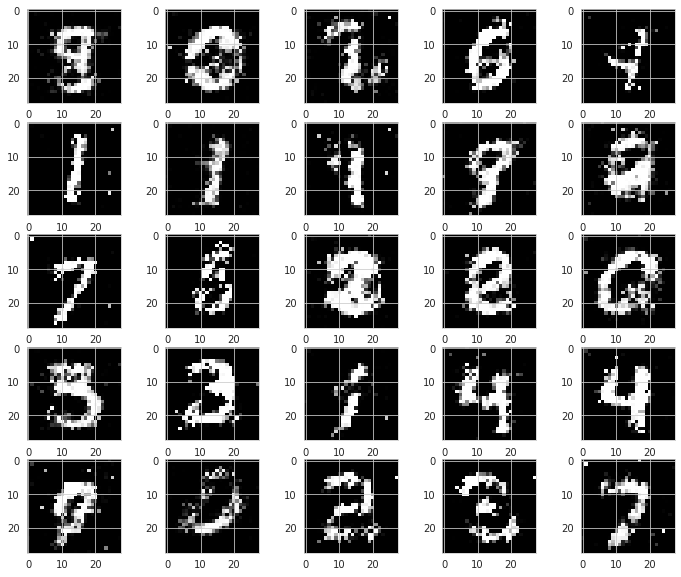

EPOCH 12


100%|██████████| 273/273 [00:18<00:00, 14.68it/s]


Losses: 0.655741810798645 | [0.9442500472068787, 0.0]


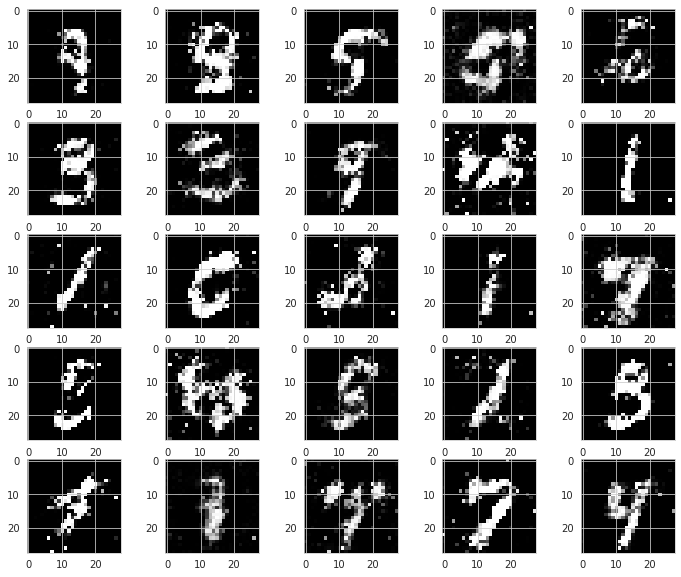

EPOCH 13


100%|██████████| 273/273 [00:18<00:00, 14.44it/s]


Losses: 0.5887075662612915 | [0.962654173374176, 0.0]


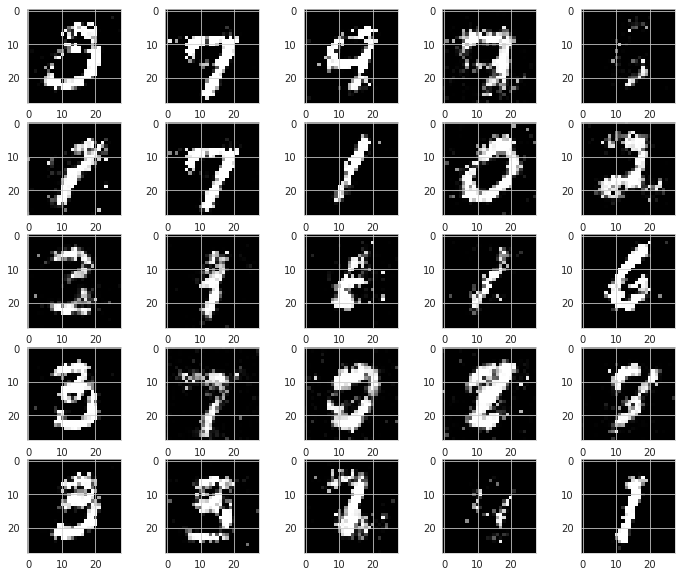

EPOCH 14


100%|██████████| 273/273 [00:18<00:00, 14.83it/s]


Losses: 0.6146909594535828 | [0.9356197118759155, 0.0]


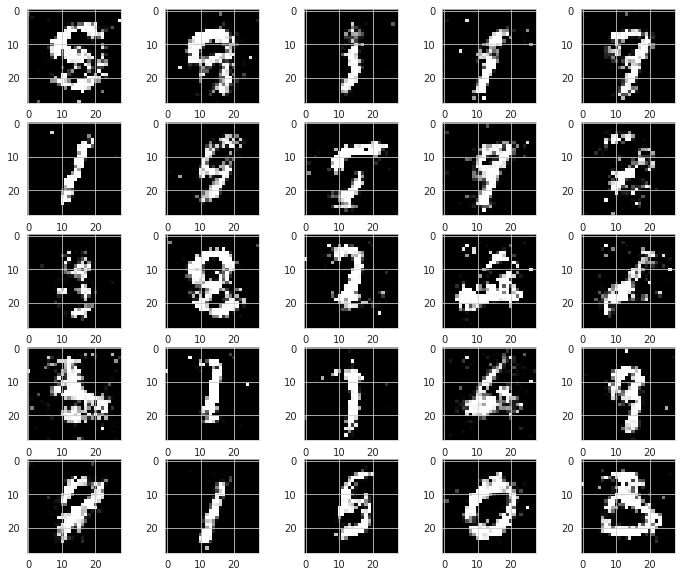

EPOCH 15


100%|██████████| 273/273 [00:18<00:00, 14.77it/s]


Losses: 0.645927369594574 | [0.8847796320915222, 0.0]


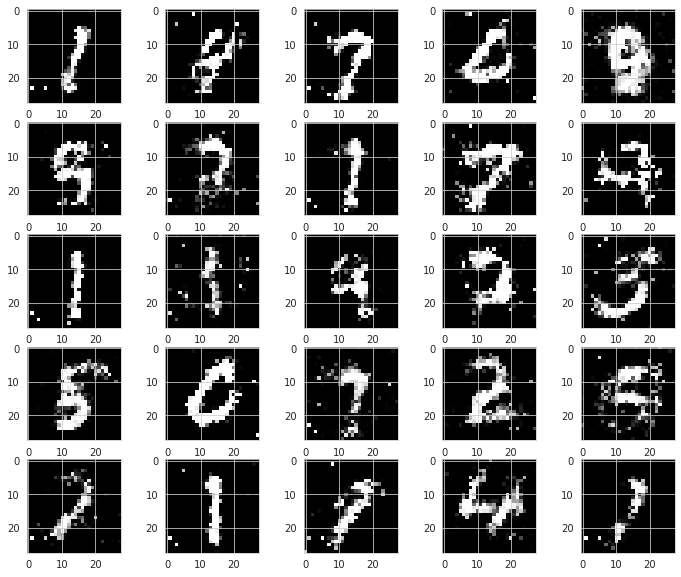

EPOCH 16


100%|██████████| 273/273 [00:18<00:00, 14.47it/s]


Losses: 0.6418604850769043 | [0.8527706265449524, 0.0]


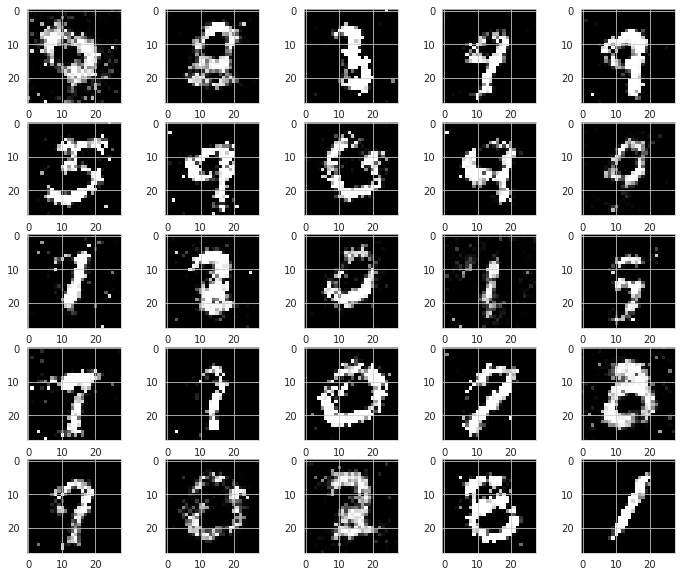

EPOCH 17


100%|██████████| 273/273 [00:18<00:00, 14.48it/s]


Losses: 0.6031656861305237 | [0.9676140546798706, 0.0]


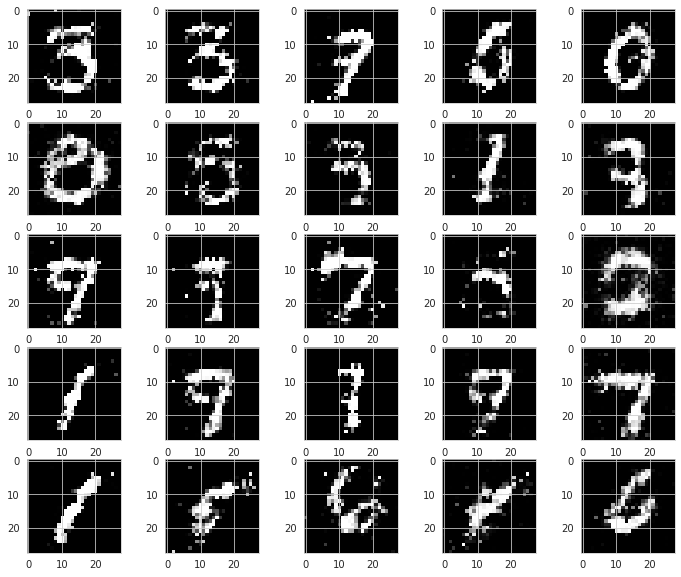

EPOCH 18


100%|██████████| 273/273 [00:18<00:00, 14.74it/s]


Losses: 0.6252716779708862 | [0.9011456966400146, 0.0]


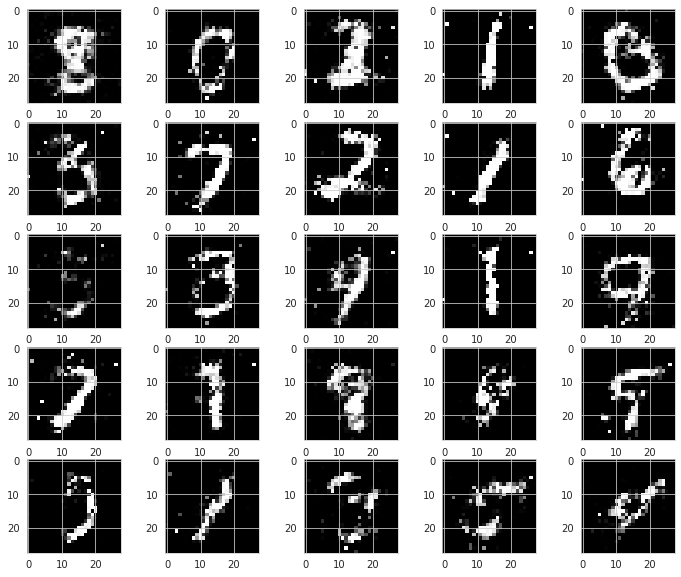

EPOCH 19


100%|██████████| 273/273 [00:18<00:00, 14.69it/s]


Losses: 0.6644887328147888 | [0.8613227009773254, 0.0]


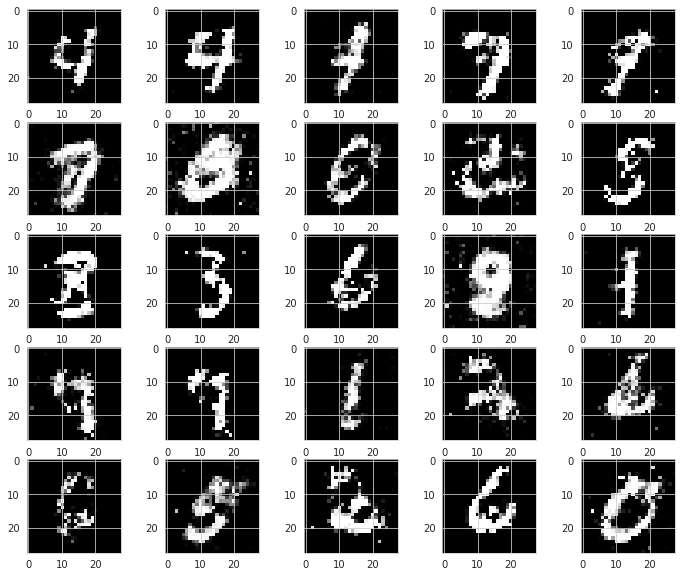

EPOCH 20


100%|██████████| 273/273 [00:19<00:00, 14.06it/s]


Losses: 0.616901695728302 | [0.8519527912139893, 0.0]


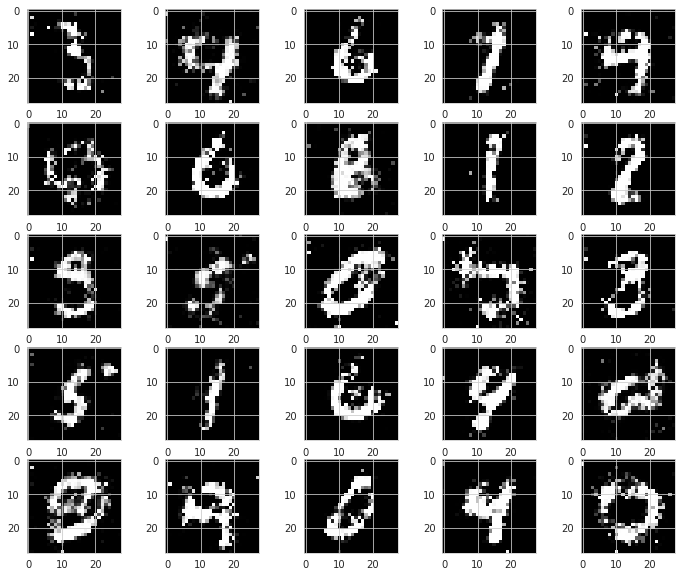

EPOCH 21


100%|██████████| 273/273 [00:18<00:00, 14.50it/s]


Losses: 0.6706684231758118 | [0.8354874849319458, 0.0]


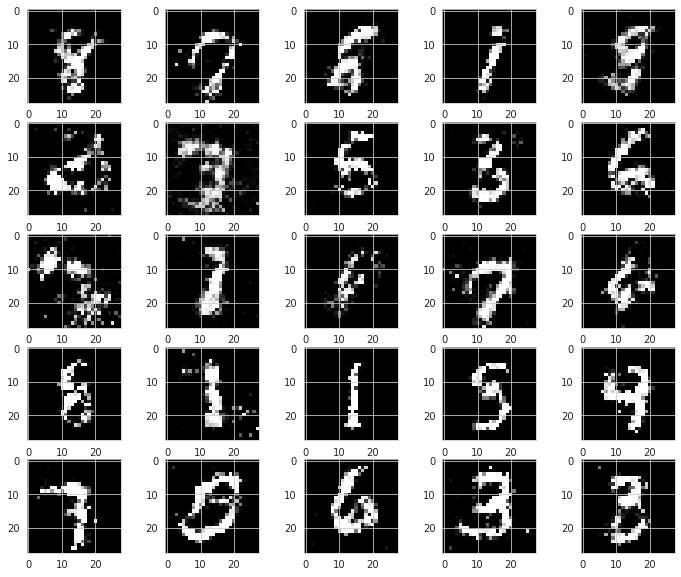

EPOCH 22


100%|██████████| 273/273 [00:18<00:00, 14.66it/s]


Losses: 0.6432316303253174 | [0.8032518625259399, 0.0]


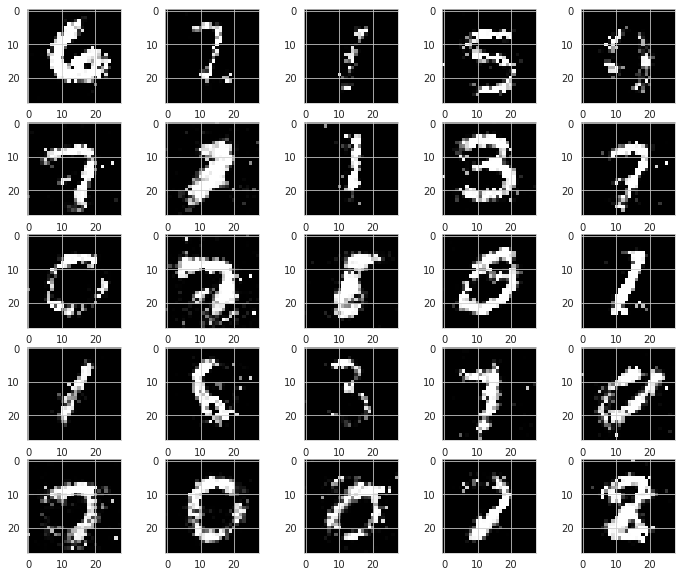

EPOCH 23


100%|██████████| 273/273 [00:19<00:00, 14.24it/s]


Losses: 0.6435742974281311 | [0.8447736501693726, 0.0]


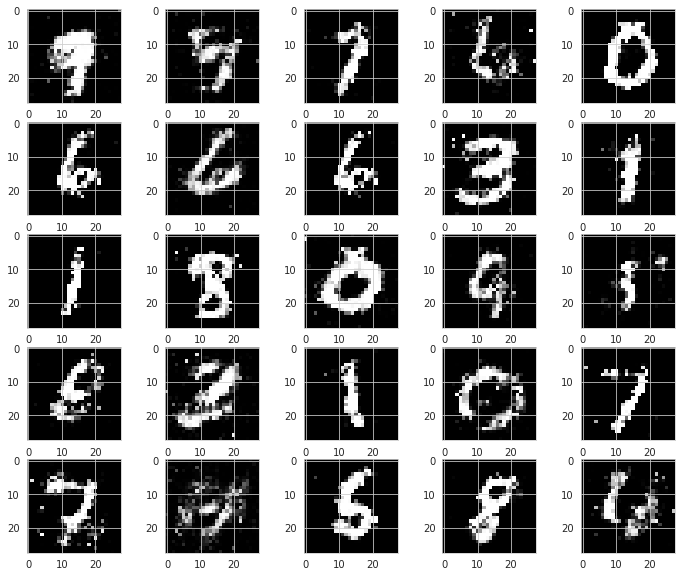

EPOCH 24


100%|██████████| 273/273 [00:18<00:00, 14.62it/s]


Losses: 0.6414644122123718 | [0.8166776895523071, 0.0]


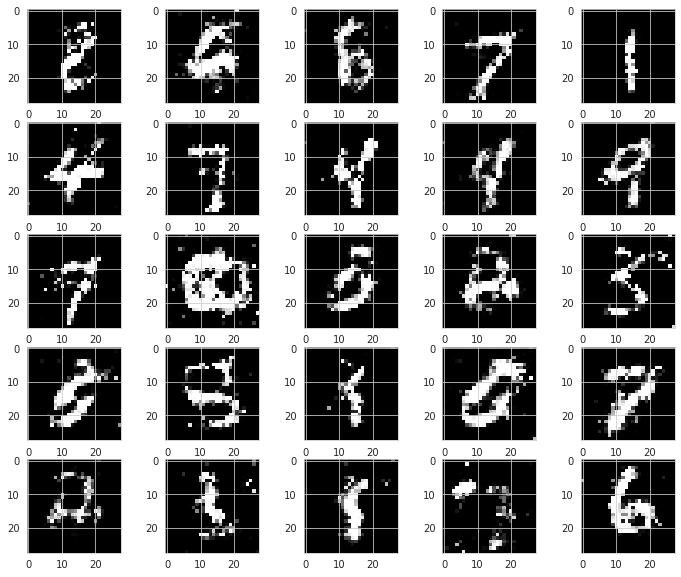

EPOCH 25


100%|██████████| 273/273 [00:18<00:00, 14.46it/s]


Losses: 0.6798252463340759 | [0.8349518775939941, 0.0]


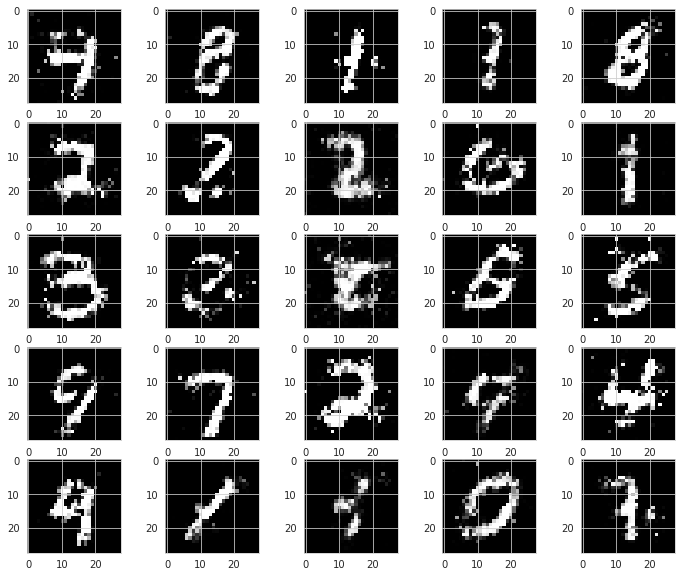

EPOCH 26


100%|██████████| 273/273 [00:18<00:00, 14.41it/s]


Losses: 0.6528801918029785 | [0.8232287168502808, 0.0]


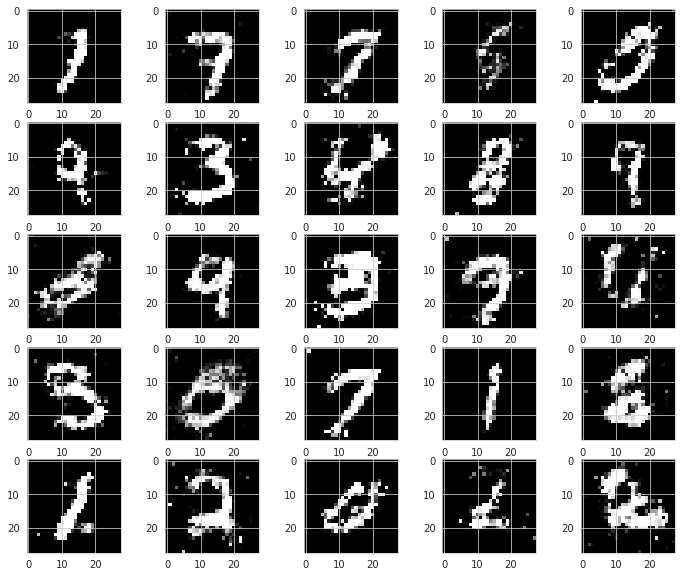

EPOCH 27


100%|██████████| 273/273 [00:18<00:00, 14.56it/s]


Losses: 0.710499107837677 | [0.8811700344085693, 0.0]


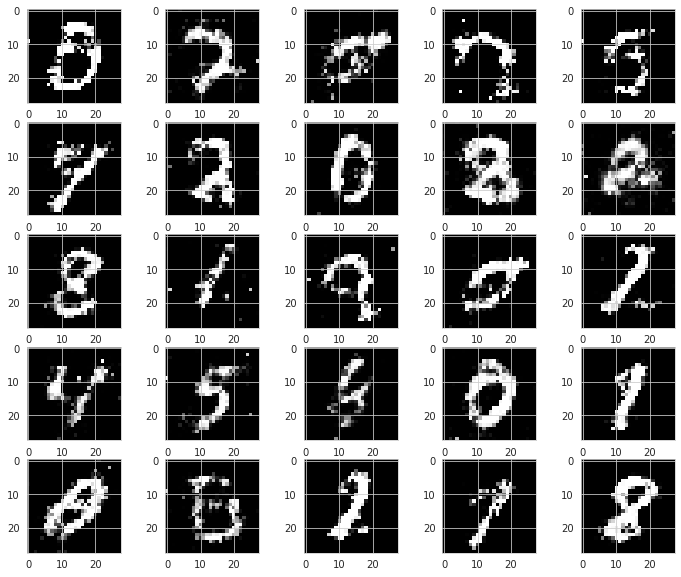

EPOCH 28


100%|██████████| 273/273 [00:18<00:00, 14.42it/s]


Losses: 0.6375751495361328 | [0.7733417749404907, 0.0]


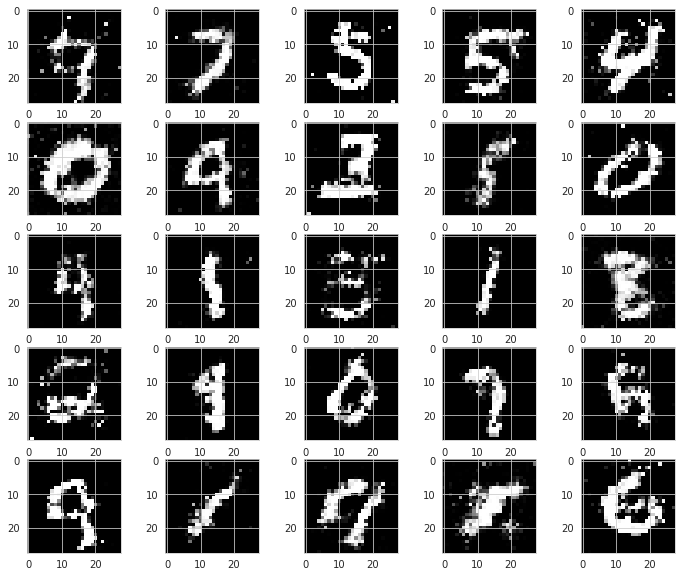

EPOCH 29


100%|██████████| 273/273 [00:18<00:00, 14.45it/s]


Losses: 0.6550930738449097 | [0.7684511542320251, 0.0]


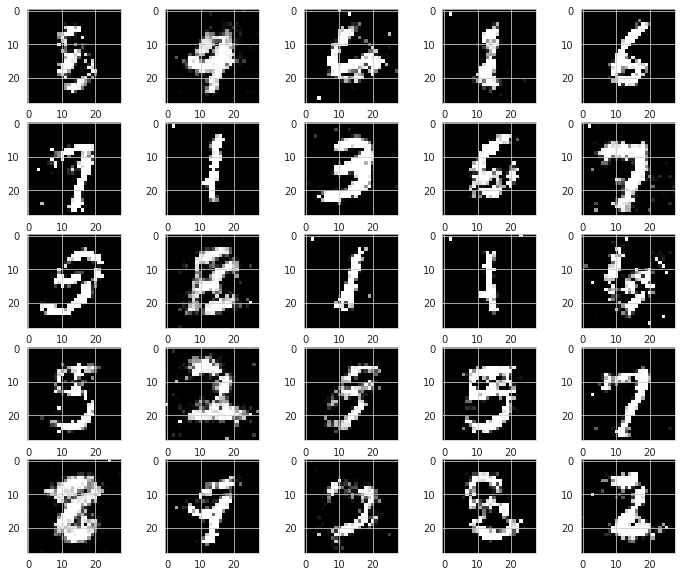

In [ ]:
for i in range(EPOCHS):
  print(f'EPOCH {i}')

  for j in tqdm(range(num_batches)):
    X_real = data[np.random.randint(0, data.shape[0], HALF_BATCH)].reshape(HALF_BATCH, 28, 28, 1)
    y_real = np.ones((HALF_BATCH, 1))

    X_fake = g.predict(np.random.randn(HALF_BATCH, INPUT_NOISE_LEN))
    y_fake = np.zeros((HALF_BATCH, 1))

    X_final = np.vstack([X_real, X_fake])
    y_final = np.vstack([y_real, y_fake])

    loss_d = d.train_on_batch(X_final, y_final)

    generator_seed = np.random.randn(BATCH_SIZE, INPUT_NOISE_LEN)
    fake_y = np.ones((BATCH_SIZE, 1))
    loss_gan = gan.train_on_batch(generator_seed, fake_y)

    losses.append([loss_d, loss_gan])
  
  fig, axes = plt.subplots(5, 5)

  print(f'Losses: {loss_d} | {loss_gan}')

  for xi in range(5):
    for yi in range(5):
      generator_seed = np.random.randn(1, INPUT_NOISE_LEN)
      predicted_im = g.predict(generator_seed)
      predicted_im = predicted_im.reshape((data.shape[1], data.shape[2]))
      axes[xi, yi].imshow(predicted_im, cmap='gray')

  plt.show()